In [1]:
#import modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load csv
def get_dfs(filename):
    global indices
    if filename.startswith('.')==False:
        df=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/go_terms/{filename}',header=None,
                       skiprows=1,index_col=0)
        strain=filename.split('_')[0]
        indices.append(strain)
        df.columns=['go_term','go_descritpion']
        df['strain']=len(df)*[strain]
        return df
    else:
        indices.append('empty')

indices=[]
dfs=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/go_terms/')).apply(
get_dfs)
dfs.index=indices
dfs

mmfvbnj                             go_term                   ...
empty                                                        None
mmdba2j                            go_term                    ...
mm129s1svimj                                   go_term  \
0   ...
empty                                                        None
mmc3hhej                                             go_term  ...
mmnodshiltj                       go_term      go_descritpion ...
mmpwkphj                          go_term                     ...
mmbalbcj                          go_term                     ...
empty                                                        None
mmnzohlltj                        go_term                     ...
mmcasteij                         go_term                     ...
mmc57bl6nj                                      go_term       ...
mmcbaj                                    go_term  \
0        ...
mmaj                              go_term                     ...
mmakrj    

In [3]:
dfs=dfs.drop('empty')

In [4]:
#merge all the dfs together
merged_df=pd.concat(dfs.tolist())
merged_df

,go_term,go_descritpion,strain
0,,,
1,cell differentiation,Notch signaling pathway,mmfvbnj
2,cell differentiation,cell differentiation,mmfvbnj
3,cell differentiation,multicellular organism development,mmfvbnj
4,cell differentiation,receptor activity,mmfvbnj
5,cell differentiation,calcium ion binding,mmfvbnj
...,...,...,...
15253,transport,regulation of potassium ion transmembrane tran...,mmwsbeij
15254,transport,potassium channel regulator activity,mmwsbeij
15255,transport,voltage-gated potassium channel complex,mmwsbeij


In [5]:
#function for gettin strain spec go terms
def get_strain_spec_go_term_counts(go_term):
    subdf=merged_df.loc[merged_df['go_term']==go_term]
    strain_spec_go_count=[]
    try:
        strains.apply(lambda strain: strain_spec_go_count.append(len(subdf.loc[subdf['strain']==strain])))
    except KeyError:
        strain_spec_go_count.append(0)
    return strain_spec_go_count

In [6]:
strains=pd.Series(['mm','mmcasteij','mmpwkphj','mmspretus','mmwsbeij','mmfvbnj', 'mmdba2j', 'mm129s1svimj',
                   'mmc3hhej','mmnodshiltj','mmbalbcj', 'mmnzohlltj', 'mmc57bl6nj','mmcbaj', 'mmaj', 'mmakrj',
                   'mmlpj',])
strains

0               mm
1        mmcasteij
2         mmpwkphj
3        mmspretus
4         mmwsbeij
5          mmfvbnj
6          mmdba2j
7     mm129s1svimj
8         mmc3hhej
9      mmnodshiltj
10        mmbalbcj
11      mmnzohlltj
12      mmc57bl6nj
13          mmcbaj
14            mmaj
15          mmakrj
16           mmlpj
dtype: object

In [7]:
#get strain spec go terms into a dataframe
go_counts=pd.Series(merged_df['go_term'].unique()).apply(get_strain_spec_go_term_counts)
go_counts.index=merged_df['go_term'].unique()
go_counts=pd.DataFrame(go_counts.tolist())
go_counts.index=merged_df['go_term'].unique()
go_counts.columns=strains
go_counts

,mm,mmcasteij,mmpwkphj,mmspretus,mmwsbeij,mmfvbnj,mmdba2j,mm129s1svimj,mmc3hhej,mmnodshiltj,mmbalbcj,mmnzohlltj,mmc57bl6nj,mmcbaj,mmaj,mmakrj,mmlpj
cell differentiation,604,361,335,329,349,343,343,332,343,339,343,343,343,340,343,343,343
molecular_function,778,480,447,489,481,473,461,464,473,456,468,477,473,459,463,462,467
biosynthetic process,485,324,315,255,325,325,325,325,325,319,325,325,325,325,325,325,325
signal transduction,421,299,261,343,273,261,261,261,271,266,261,261,261,261,261,261,261
anatomical structure development,616,397,372,365,383,393,380,370,380,367,380,380,380,377,371,380,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATPase,22,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0
DNA metabolic process,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0
biological process involved in symbiotic interaction,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
glycosyltransferase activity,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#https://www.ebi.ac.uk/QuickGO/
biological_process=[
    'cell differentiation',
    'biosynthetic process',
    'signal transduction',
    'anatomical structure development',
    'cellular nitrogen compound metabolic process',
    'cell adhesion',
    'cellular protein modification process',
    'immune system process',
    'cell morphogenesis',
    'cellular component assembly',
    'membrane organization',
    'cytoskeleton organization',
    'protein complex assembly',
    'macromolecular complex assembly',
    'catabolic process',
    'cell proliferation',
    'small molecule metabolic process',
    'protein targeting',
    'nucleocytoplasmic transport',
    'sulfur compound metabolic process',
    'cell death',
    'anatomical structure formation involved in morphogenesis',
    'transport',
    'vesicle-mediated transport',
    'circulatory system process',
    'locomotion',
    'cell motility',
    'embryo development',
    'cell-cell signaling',
    'response to stress',
    'cell cycle',
    'homeostatic process',
    'ribosome biogenesis',
    'transmembrane transport',
    'reproduction',
    'growth',
    'plasma membrane organization',
    'mRNA processing',
    'translation',
    'lipid metabolic process',
    'mitotic cell cycle',
    'developmental maturation',
    'aging',
    'nervous system process',
    'cytoskeleton-dependent intracellular transport',
    'extracellular matrix organization',
    'chromosome organization',
    'tRNA metabolic process',
    'cellular amino acid metabolic process',
    'symbiont process',
    'mitochondrion organization',
    'autophagy',
    'chromosome segregation',
    'mitotic nuclear division',
    'cell division',
    'protein maturation',
    'cell population proliferation',
    'protein-containing complex assembly',
    'protein transport',
    'carbohydrate metabolic process',
    'generation of precursor metabolites and energy',
    'cell junction organization',
    'DNA metabolic process',
    'biological process involved in symbiotic interaction',
    
]
cellular_component=[
    'microtubule organizing center',
    'cytoplasm',
    'intracellular',
    'cell',
    'cytoskeleton',
    'organelle',
    'plasma membrane',
    'nucleoplasm',
    'nucleus',
    'extracellular space',
    'extracellular region',
    'cytoplasmic vesicle',
    'protein complex',
    'nucleolus',
    'Golgi apparatus',
    'endosome',
    'cytosol',
    'endoplasmic reticulum',
    'cilium',
    'nuclear envelope',
    'lipid droplet',
    'mitochondrion',
    'vacuole',
    'lysosome',
    'chromosome',
    'intracellular anatomical structure',
    'protein-containing complex',
    'extracellular matrix',
    'external encapsulating structure',
    
]
molecular_function=[
    'ion binding',
    'phosphatase activity',
    'enzyme regulator activity',
    'enzyme binding',
    'cytoskeletal protein binding',
    'RNA binding',
    'GTPase activity',
    'transferase activity, transferring acyl groups',
    'hydrolase activity, acting on glycosyl bonds',
    'signal transducer activity',
    'hydrolase activity, acting on carbon-nitrogen (but not peptide) bonds',
    'DNA binding',
    'DNA binding transcription factor activity',
    'transcription factor activity, protein binding',
    'transcription factor binding',
    'lipid binding',
    'methyltransferase activity',
    'transferase activity, transferring glycosyl groups',
    'ATPase activity',
    'oxidoreductase activity',
    'ligase activity',
    'kinase activity',
    'transmembrane transporter activity',
    'peptidase activity',
    'DNA-binding transcription factor activity',
    'structural molecule activity',
    'ATPase',
    'glycosyltransferase activity',
    'acyltransferase activity',
    
]

In [9]:
biological_process_gos=go_counts.loc[biological_process]
cellular_component_gos=go_counts.loc[cellular_component]
molecular_function_gos=go_counts.loc[molecular_function]

In [10]:
biological_process_gos.index.values

array(['cell differentiation', 'biosynthetic process',
       'signal transduction', 'anatomical structure development',
       'cellular nitrogen compound metabolic process', 'cell adhesion',
       'cellular protein modification process', 'immune system process',
       'cell morphogenesis', 'cellular component assembly',
       'membrane organization', 'cytoskeleton organization',
       'protein complex assembly', 'macromolecular complex assembly',
       'catabolic process', 'cell proliferation',
       'small molecule metabolic process', 'protein targeting',
       'nucleocytoplasmic transport', 'sulfur compound metabolic process',
       'cell death',
       'anatomical structure formation involved in morphogenesis',
       'transport', 'vesicle-mediated transport',
       'circulatory system process', 'locomotion', 'cell motility',
       'embryo development', 'cell-cell signaling', 'response to stress',
       'cell cycle', 'homeostatic process', 'ribosome biogenesis',
       

In [11]:
np.arange(0,len(biological_process_gos.index.values),1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

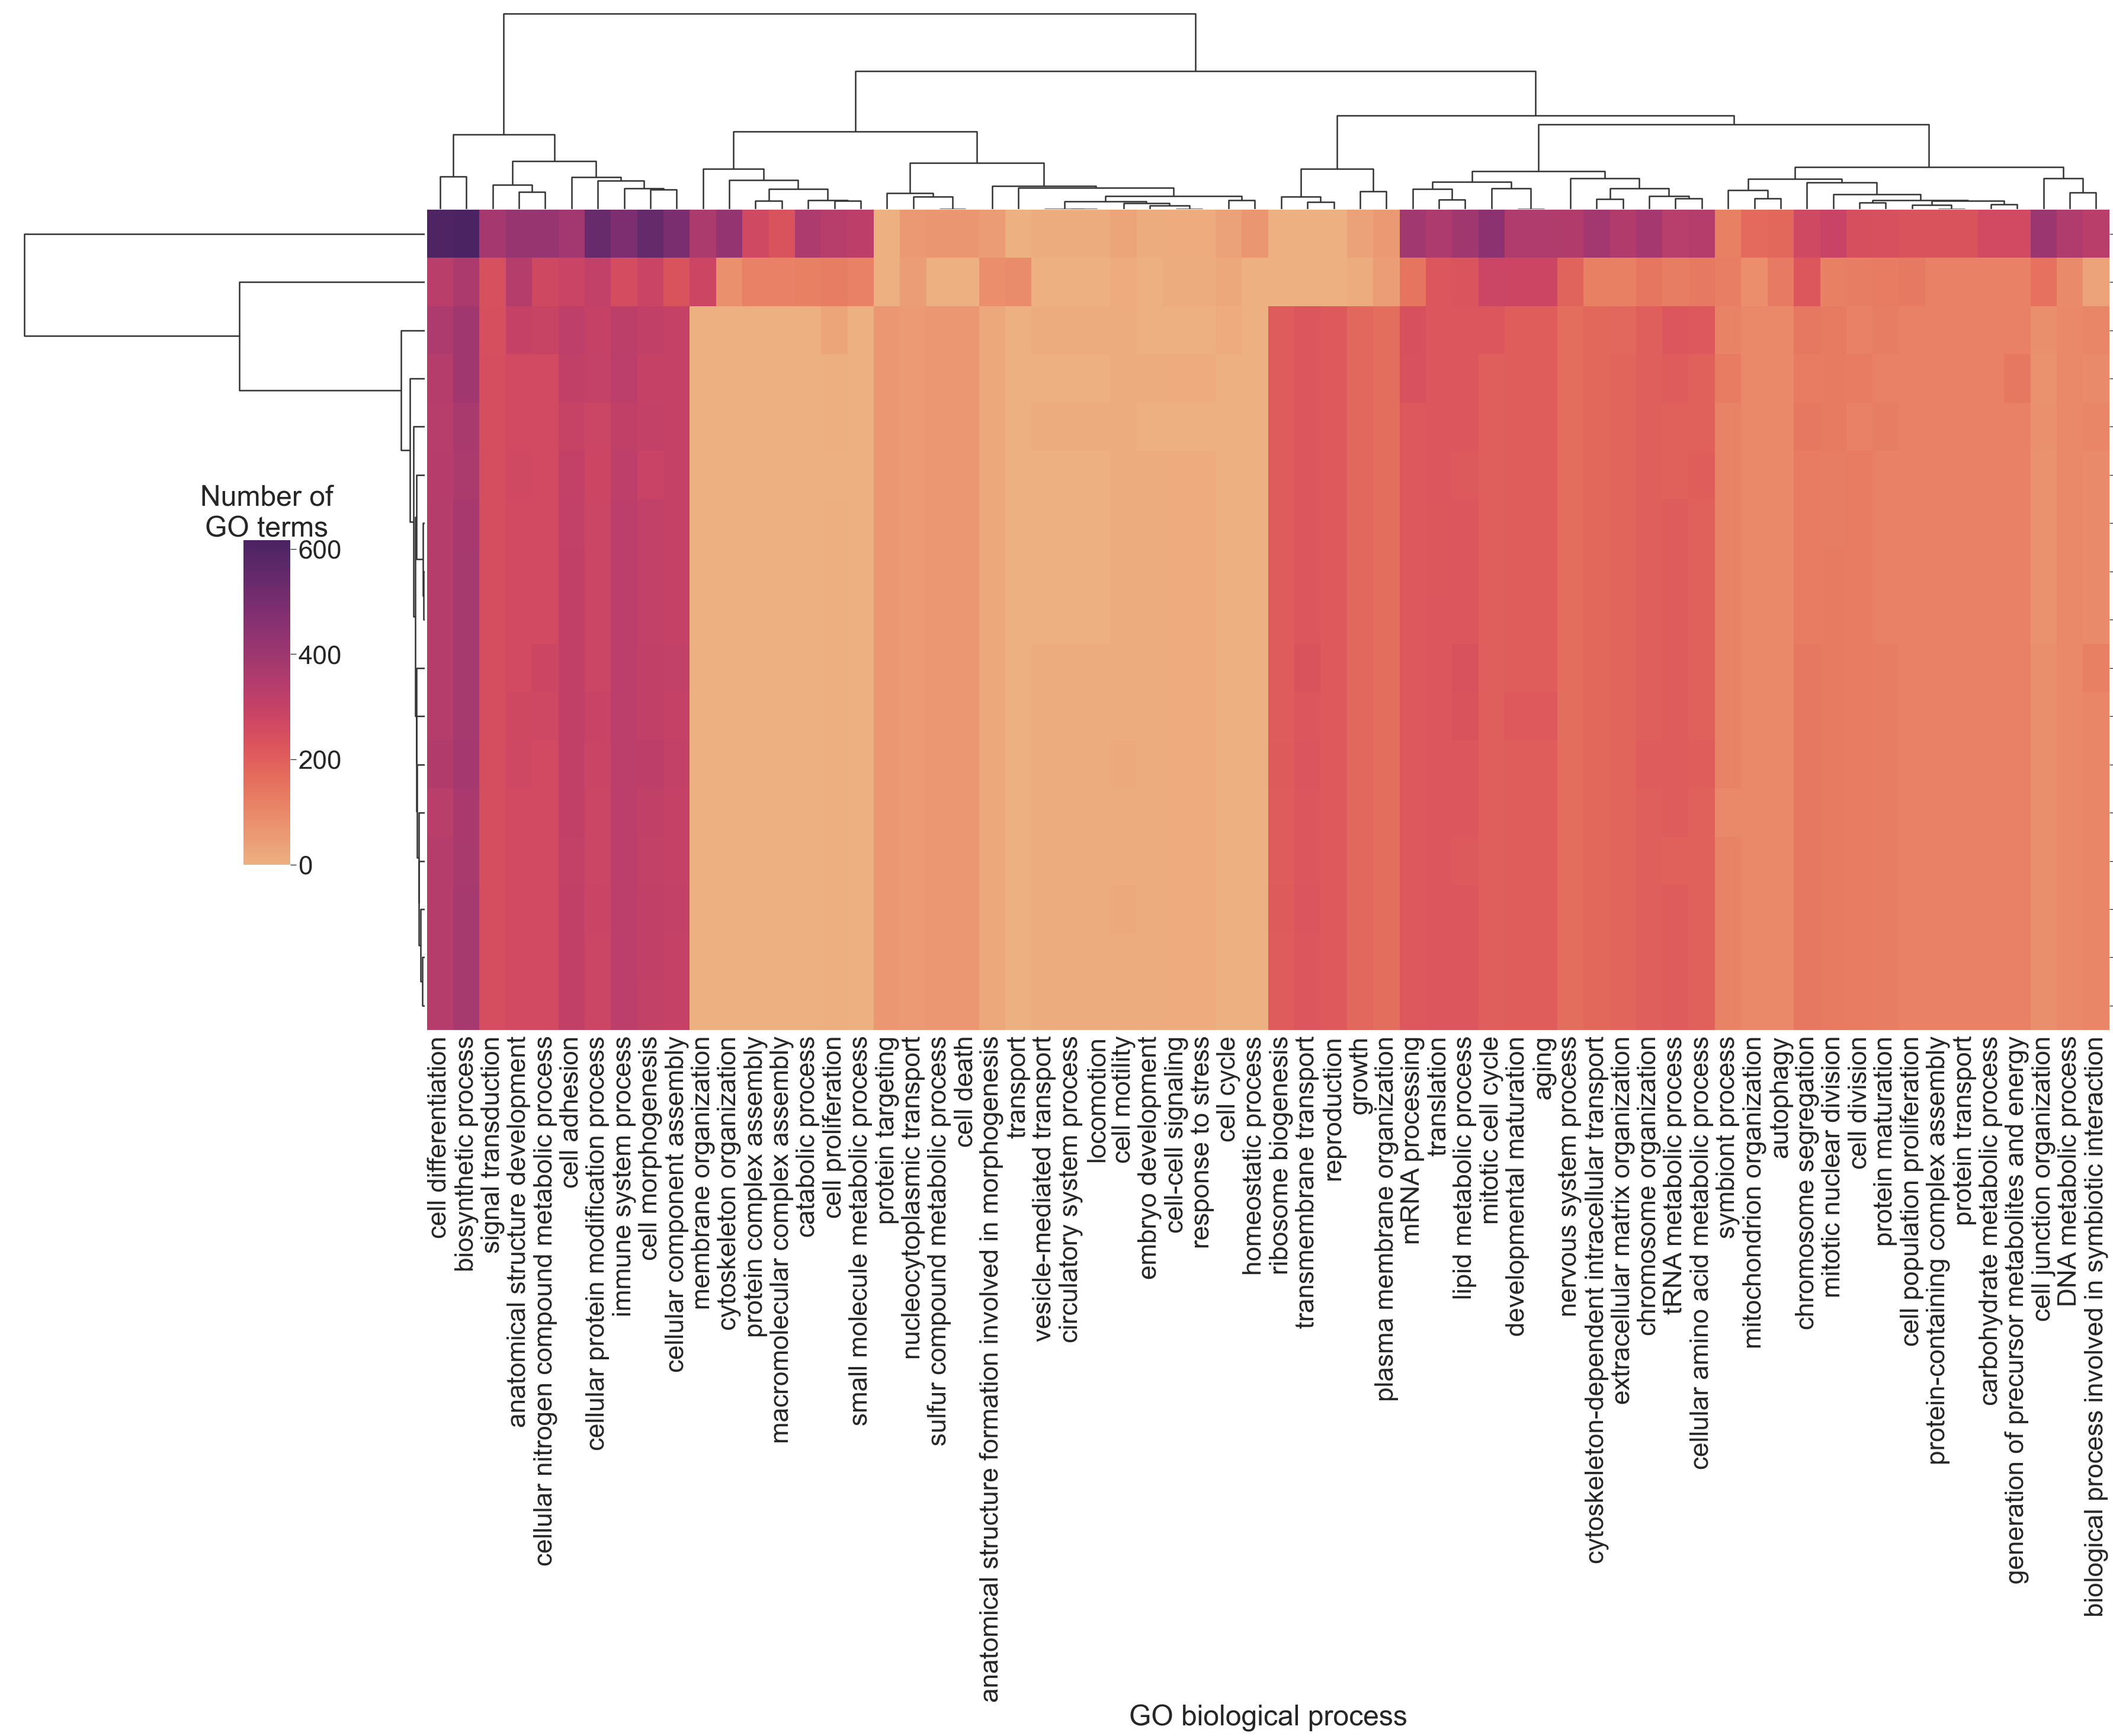

In [19]:
sns.set(font_scale=4)
fig=sns.clustermap(biological_process_gos.T,
                   cmap='flare',
                   figsize=(55,38),
                  tree_kws=dict(linewidths=2.5))
fig.ax_cbar.set_position([0.115, 0.45, 0.02, 0.2])
fig.ax_cbar.set_title('Number of\nGO terms')
fig.ax_cbar.tick_params(axis='y', length=10)
fig.ax_heatmap.set_xticks(np.arange(0.5,len(biological_process_gos.index.values),1))
fig.ax_heatmap.set_xticklabels(biological_process_gos.index.values)
fig.ax_heatmap.set_yticklabels([])
fig.ax_heatmap.set_xlabel('GO biological process')
fig.savefig('../results/biological_process_go.png',dpi=400)

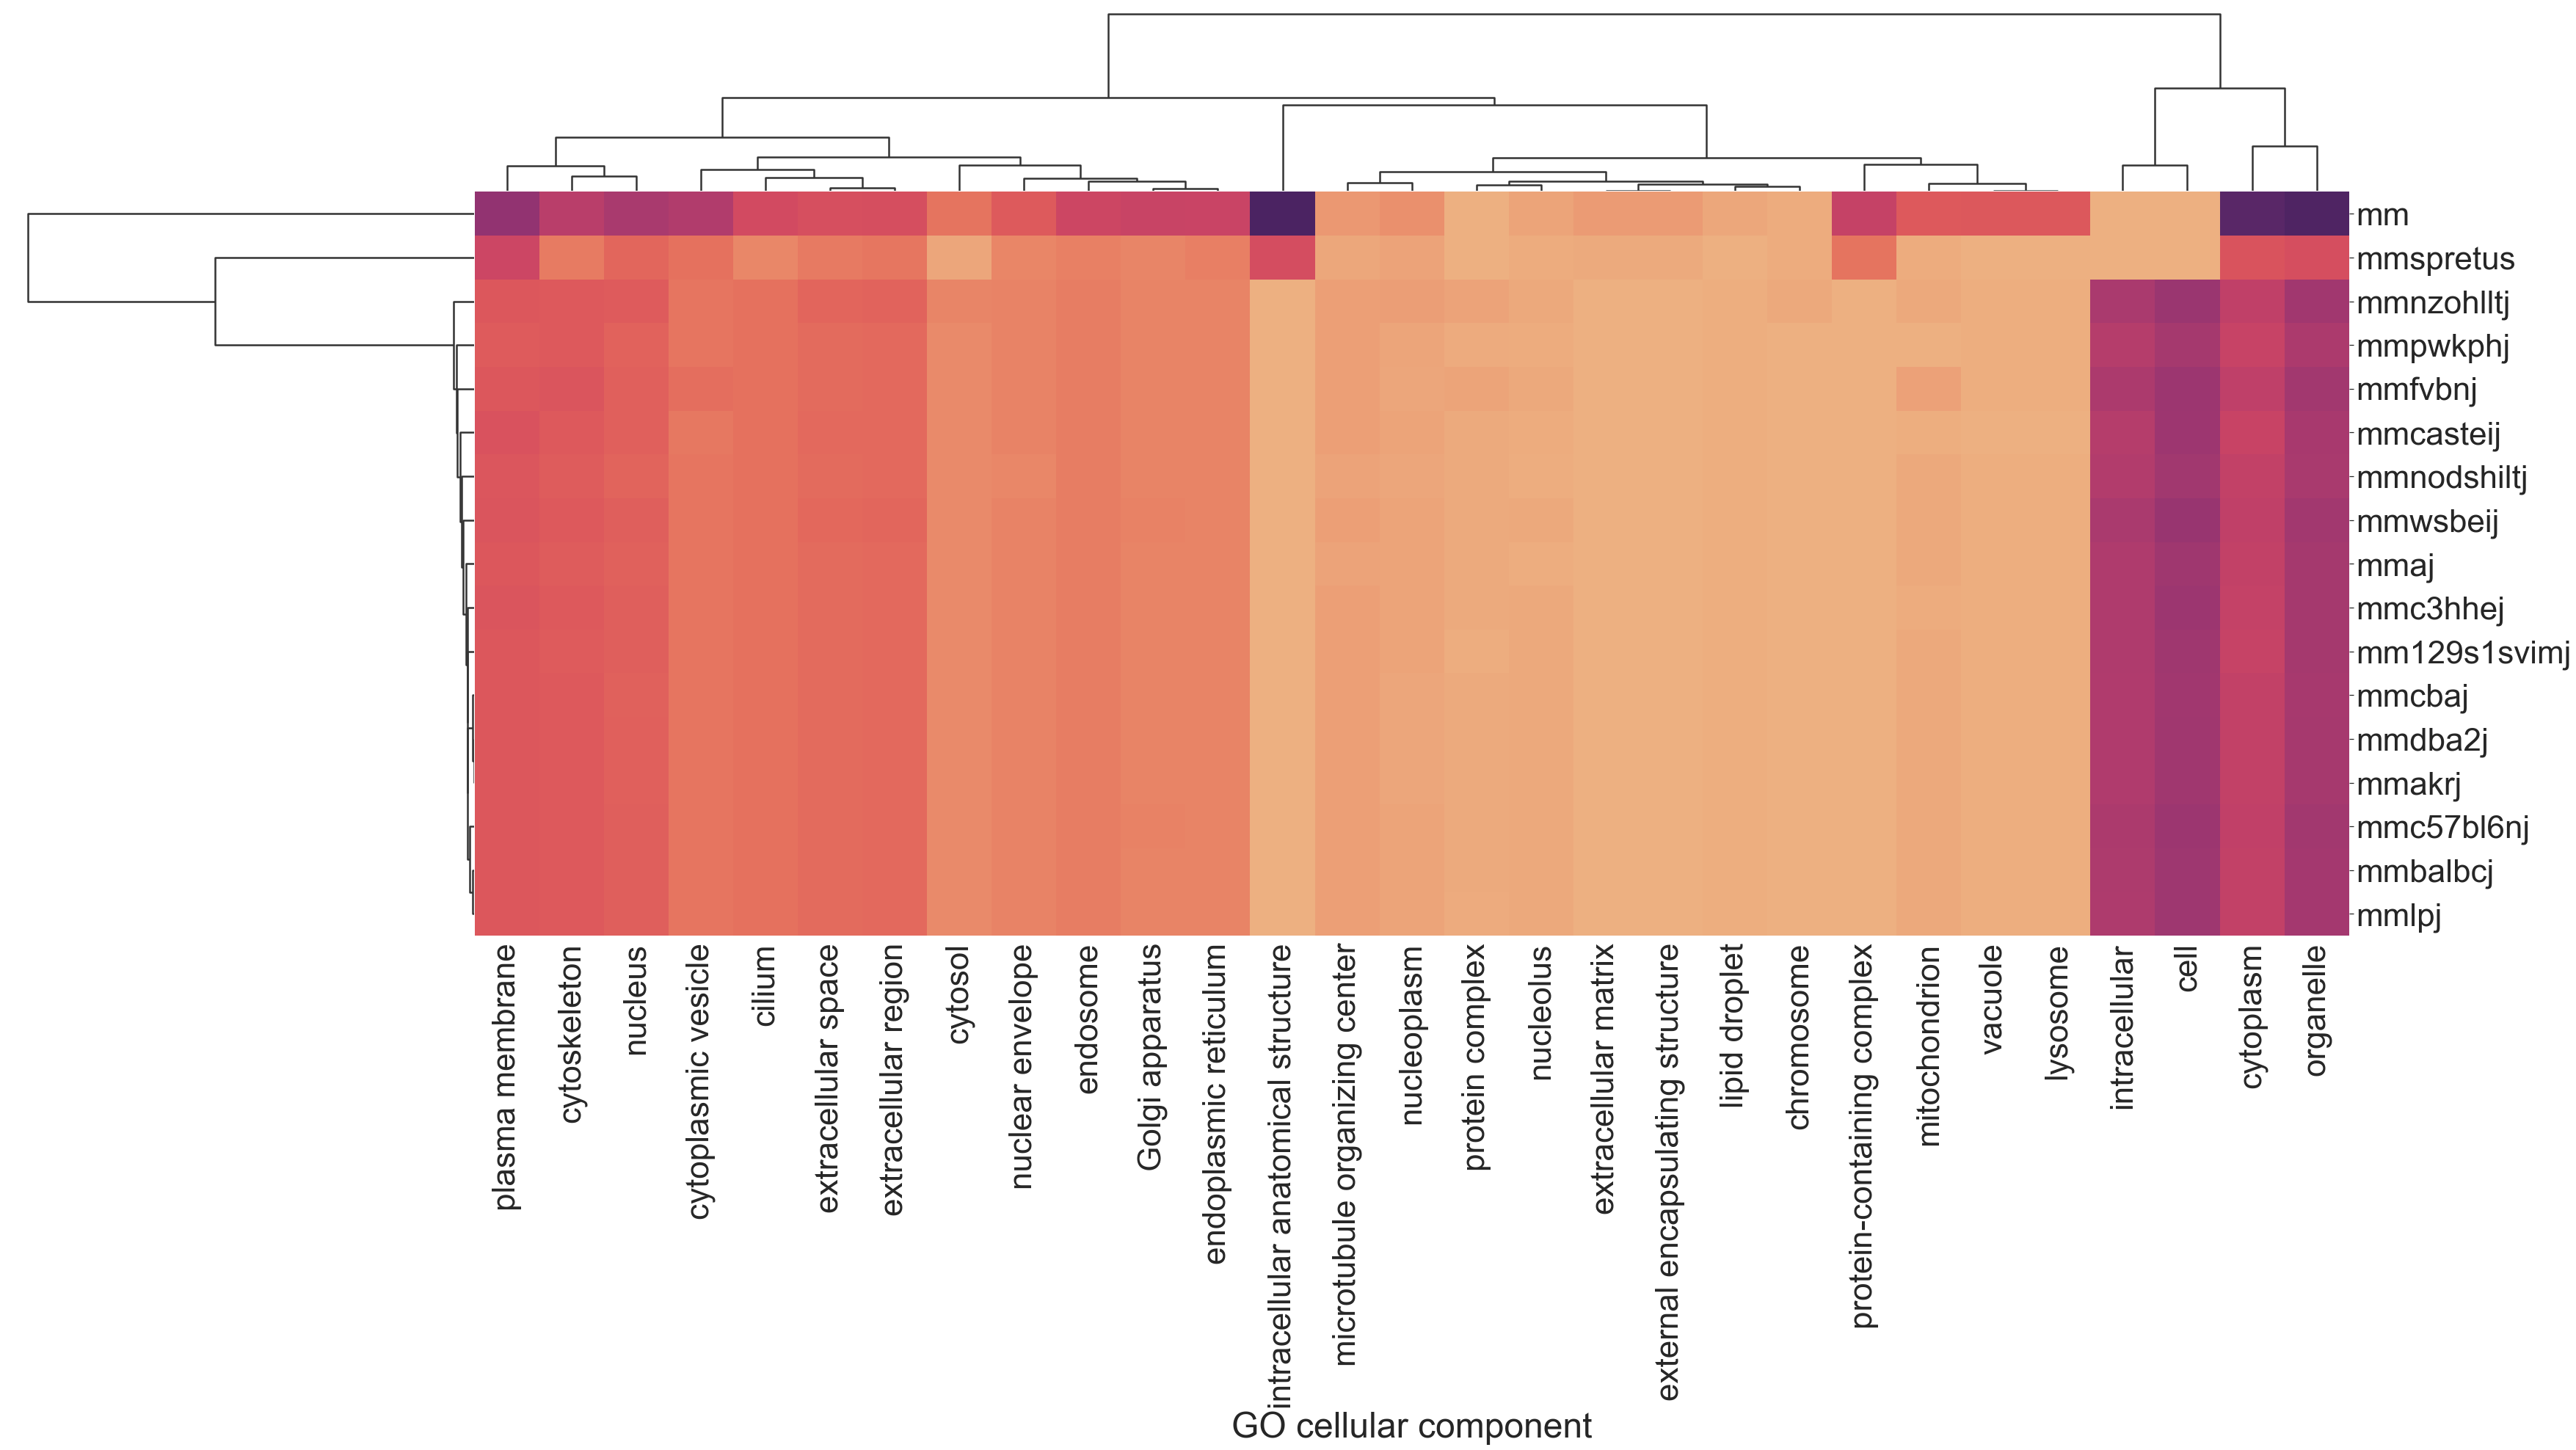

In [14]:
sns.set(font_scale=4)
fig=sns.clustermap(cellular_component_gos.T,
                   cmap='flare',
                   figsize=(50,28),
                  tree_kws=dict(linewidths=2.5))
fig.ax_cbar.set_position([0.115, 0.45, 0.02, 0.2])
fig.ax_cbar.set_title('Number of\nGO terms')
fig.ax_cbar.tick_params(axis='y', length=10)
#fig.ax_heatmap.set_yticklabels([])
fig.cax.set_visible(False)
fig.ax_heatmap.set_xlabel('GO cellular component')
fig.savefig('../results/cellular_component_go.png',dpi=200)

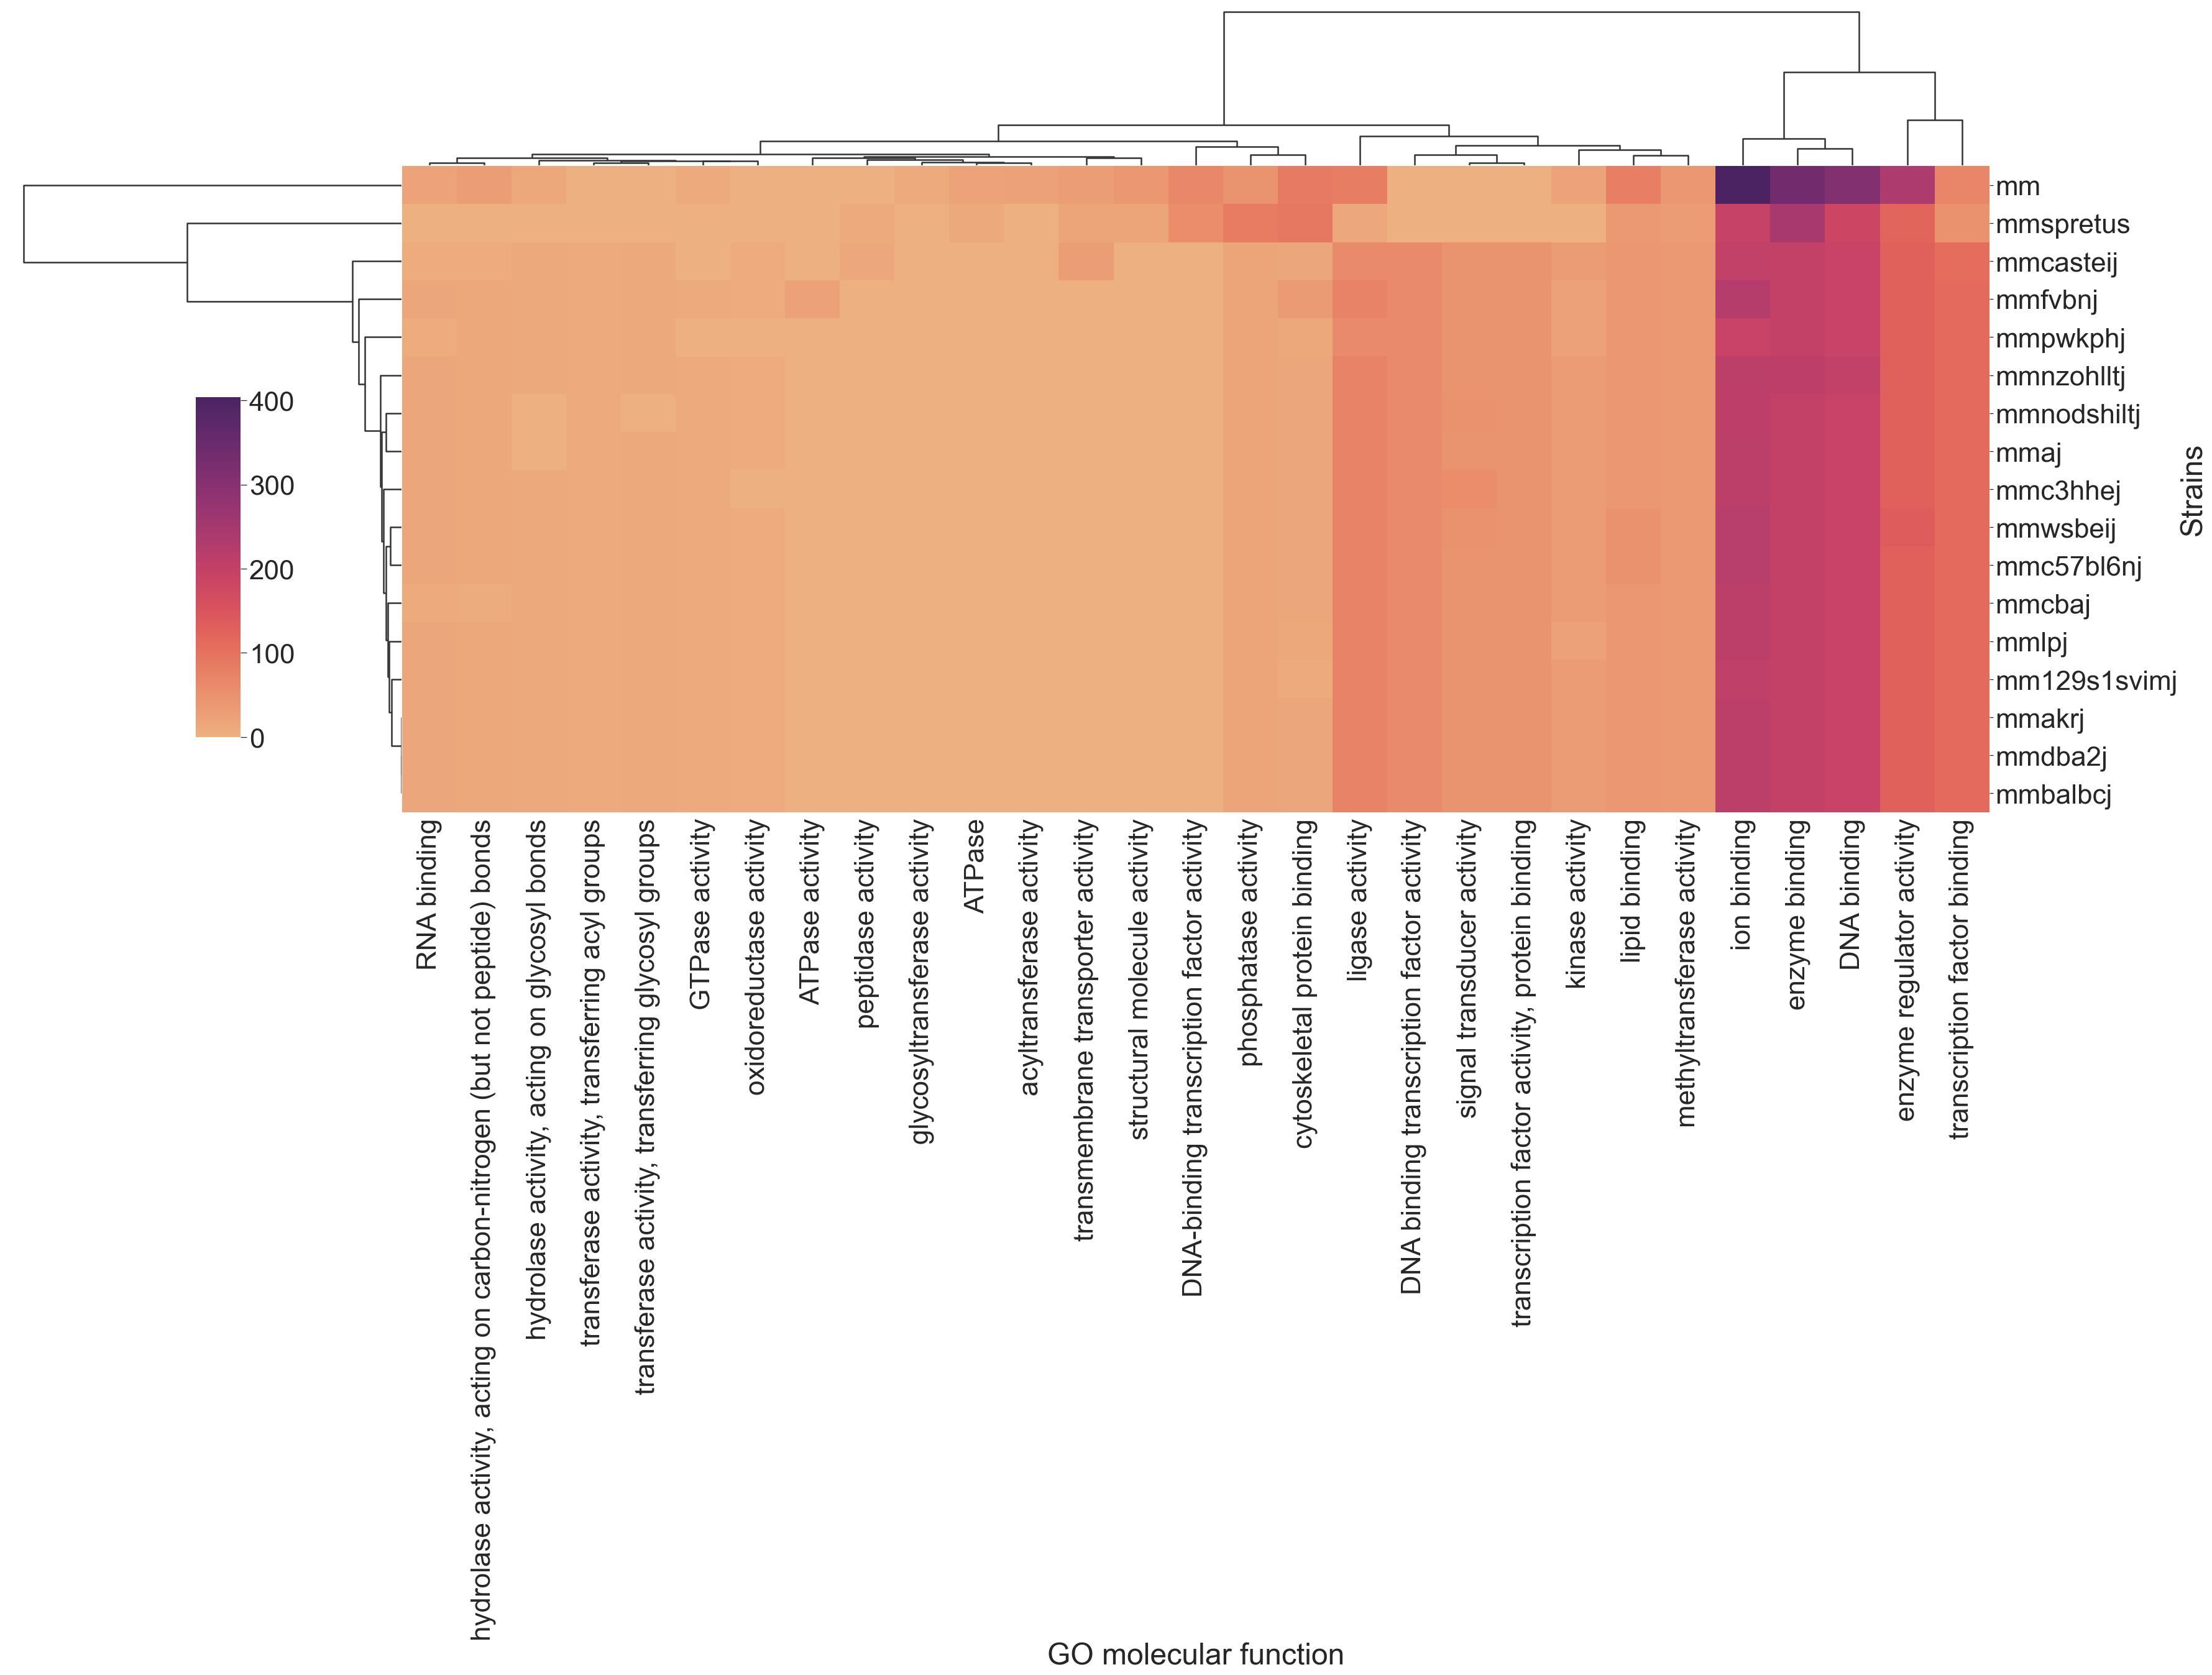

In [15]:
sns.set(font_scale=4)
fig=sns.clustermap(molecular_function_gos.T,
                   cmap='flare',
                   figsize=(50,38),
                  tree_kws=dict(linewidths=2.5))
fig.ax_cbar.set_position([0.1, 0.55, 0.02, 0.2])
fig.ax_cbar.tick_params(axis='y', length=10)
fig.ax_heatmap.set_xlabel('GO molecular function')
fig.ax_heatmap.set_ylabel('Strains')
#fig.cax.set_visible(False)
fig.savefig('../results/molecular_function_go.png',dpi=200)